#Clustering T1 metrics

In [220]:
import pandas as pd
import os
import scipy.cluster as clust
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import calinski_harabasz_score as CHS
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import networkx as nx
from networkx import drawing

In [3]:
#os.getcwd()
raw_metrics = pd.read_csv('/Users/labc02/Documents/PREEMACS/all_data_56.csv')

In [13]:
# raw_metrics.drop('Unnamed: 0', axis = 1, inplace = True)
# Rename columns 
raw_metrics.rename(columns = {'Stie': 'Site', 'Unnamed: 2': 'Class'}, inplace = True)

In [14]:
# Leave sites name readable
for idx, ii in enumerate(raw_metrics['Site']):
    if 'site' in ii:
        tags = ii.split('_')
        site_ = tags[0].split('-')[1]
        raw_metrics['Site'][idx] = site_
        
    else:
        tag = ii.split('_')[0]
        raw_metrics['Site'][idx] = tag
raw_metrics

<ipython-input-14-b67af46154a6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_metrics['Site'][idx] = site_
<ipython-input-14-b67af46154a6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_metrics['Site'][idx] = tag


,Site,Class,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,fwhm_z,...,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
0,ecnu,3,0.409397,2.913219,0.715257,600.080933,6.226380,5.989560,7.196520,5.493060,...,1009.033508,1000.040222,127551,880.848877,1168.769653,89.639183,0.107666,0.464450,0.462619,0.627042
1,inb,1,0.363575,1.185816,0.818763,2.342441,4.326220,4.403460,4.651660,3.923540,...,1005.550415,1000.068604,91156,873.292297,1163.312317,91.864876,0.246178,0.496330,0.548421,0.545084
2,inb,1,0.295408,1.710220,0.807236,17.595476,4.364407,4.447380,4.654760,3.991080,...,996.779724,1000.122437,87930,849.544781,1136.036737,87.167152,0.233891,0.531830,0.567478,0.553466
3,mcgill,1,0.388420,2.610545,0.639800,513.773499,4.212207,4.090680,4.501100,4.044840,...,996.580200,1000.051392,101963,866.116742,1119.841089,80.808609,0.209153,0.525716,0.553992,0.752620
4,mcgill,1,0.258616,1.907247,0.724512,667.371582,4.206687,4.052800,4.571260,3.996000,...,983.394287,999.992310,56663,808.312201,1094.974976,85.029373,0.161806,0.479573,0.519907,0.681010
5,mountsinai,1,0.454108,1.305413,0.770972,24.959061,3.983900,3.887980,4.197940,3.865780,...,1010.812561,1000.049683,66220,868.054862,1178.798804,98.737091,0.149670,0.483430,0.487926,0.391886
6,mountsinai,1,0.467315,1.755173,0.780938,52.882195,3.895660,3.803400,4.282740,3.600840,...,1026.602051,1000.082764,102637,871.192993,1289.535962,132.355225,0.177889,0.506424,0.516069,0.528831
7,mountsinai,1,0.480983,1.947602,0.725609,76.841400,4.030427,4.117540,4.240940,3.732800,...,1015.112244,1000.038208,119905,878.852930,1194.006006,99.086533,0.140444,0.463028,0.471911,0.487361
8,mountsinai,1,0.505292,1.494142,0.783224,27.716814,3.870553,3.858880,4.078420,3.674360,...,1016.815369,1000.085693,93942,869.342133,1212.048645,108.708939,0.170416,0.473192,0.485420,0.435676
9,mountsinai,3,0.462706,2.077642,0.554237,7.993619,4.018567,3.753100,4.571020,3.731580,...,1029.847900,999.708069,115033,737.965137,1422.063647,209.759277,0.153884,0.402412,0.379893,0.249390


In [23]:
raw_metrics.to_csv('/Users/labc02/Documents/PREEMACS/clean_56.csv')

In [15]:
cln_metrics = pd.read_csv('/Users/labc02/Documents/PREEMACS/clean_56.csv')

In [16]:
tidy_df = cln_metrics.drop(['spacing_x', 'spacing_y', 'spacing_z', 'size_x', 'size_y', 'size_z'], axis = 1)

In [40]:
# Number of non-trivial features (metrics)
len(tidy_df.columns)

62

In [188]:
# DO NOT RUN AGAIN
# This creates a shitload of figures
fig_num = 0
for ii in range(3, 31, 4):
    for jj in range(31, 62, 4):
        g = sns.PairGrid(std_df, hue= 'Class', x_vars = std_df.columns[ii:ii+4], y_vars = std_df.columns[jj:jj+4])
        g.map(plt.scatter)
        g.add_legend()
        g.savefig(f'/Users/labc02/Documents/PREEMACS/Std_VarGrid{fig_num}')
        plt.close()
        fig_num += 1

In [41]:
tidy_df.rename(columns={'Unnamed: 0':'Idx'}, inplace = True)
tidy_df

,Idx,Site,Class,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,...,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
0,0,ecnu,3,0.409397,2.913219,0.715257,600.080933,6.226380,5.989560,7.196520,...,1009.033508,1000.040222,127551,880.848877,1168.769653,89.639183,0.107666,0.464450,0.462619,0.627042
1,1,inb,1,0.363575,1.185816,0.818763,2.342441,4.326220,4.403460,4.651660,...,1005.550415,1000.068604,91156,873.292297,1163.312317,91.864876,0.246178,0.496330,0.548421,0.545084
2,2,inb,1,0.295408,1.710220,0.807236,17.595476,4.364407,4.447380,4.654760,...,996.779724,1000.122437,87930,849.544781,1136.036737,87.167152,0.233891,0.531830,0.567478,0.553466
3,3,mcgill,1,0.388420,2.610545,0.639800,513.773499,4.212207,4.090680,4.501100,...,996.580200,1000.051392,101963,866.116742,1119.841089,80.808609,0.209153,0.525716,0.553992,0.752620
4,4,mcgill,1,0.258616,1.907247,0.724512,667.371582,4.206687,4.052800,4.571260,...,983.394287,999.992310,56663,808.312201,1094.974976,85.029373,0.161806,0.479573,0.519907,0.681010
5,5,mountsinai,1,0.454108,1.305413,0.770972,24.959061,3.983900,3.887980,4.197940,...,1010.812561,1000.049683,66220,868.054862,1178.798804,98.737091,0.149670,0.483430,0.487926,0.391886
6,6,mountsinai,1,0.467315,1.755173,0.780938,52.882195,3.895660,3.803400,4.282740,...,1026.602051,1000.082764,102637,871.192993,1289.535962,132.355225,0.177889,0.506424,0.516069,0.528831
7,7,mountsinai,1,0.480983,1.947602,0.725609,76.841400,4.030427,4.117540,4.240940,...,1015.112244,1000.038208,119905,878.852930,1194.006006,99.086533,0.140444,0.463028,0.471911,0.487361
8,8,mountsinai,1,0.505292,1.494142,0.783224,27.716814,3.870553,3.858880,4.078420,...,1016.815369,1000.085693,93942,869.342133,1212.048645,108.708939,0.170416,0.473192,0.485420,0.435676
9,9,mountsinai,3,0.462706,2.077642,0.554237,7.993619,4.018567,3.753100,4.571020,...,1029.847900,999.708069,115033,737.965137,1422.063647,209.759277,0.153884,0.402412,0.379893,0.249390


In [19]:
#AGAIN, NOT NEEDED
# Non standarized metrics work better
std_df = tidy_df.copy()
wk_slice = std_df.iloc[:,3:].copy()
wk_slice = (wk_slice - wk_slice.mean()) / wk_slice.std()
std_df.iloc[:,3:] = wk_slice
std_df

,Unnamed: 0,Site,Class,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,...,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
0,0,ecnu,3,-0.387297,2.666244,-0.482272,2.454995,1.583906,1.336239,1.915017,...,0.031597,0.290537,0.765005,0.253394,-0.174676,-0.219749,-0.856791,0.401171,-0.015805,1.496013
1,1,inb,1,-1.091073,-1.082561,0.877493,-0.786202,-0.301523,-0.266195,-0.268292,...,-0.441373,0.538061,-0.235860,0.081241,-0.256433,-0.150673,1.388425,0.804810,0.820284,0.735981
2,2,inb,1,-2.138050,0.055499,0.726051,-0.703493,-0.263632,-0.221822,-0.265633,...,-1.632348,1.007547,-0.324575,-0.459773,-0.665049,-0.296470,1.189261,1.254282,1.005976,0.813716
3,3,mcgill,1,-0.709474,2.009382,-1.473554,1.986998,-0.414652,-0.582196,-0.397462,...,-1.659442,0.387952,0.061334,-0.082232,-0.907676,-0.493811,0.788258,1.176872,0.874566,2.660546
4,4,mcgill,1,-2.703138,0.483087,-0.360685,2.819874,-0.420129,-0.620466,-0.337270,...,-3.449962,-0.127314,-1.184420,-1.399130,-1.280196,-0.362817,0.020785,0.592642,0.542429,1.996478
5,5,mountsinai,1,0.299414,-0.823011,0.249658,-0.663565,-0.641189,-0.786983,-0.657552,...,0.273176,0.373048,-0.921602,-0.038078,-0.024430,0.062611,-0.175932,0.641476,0.230798,-0.684688
6,6,mountsinai,1,0.502259,0.153057,0.380574,-0.512153,-0.728745,-0.872434,-0.584800,...,2.417237,0.661552,0.079869,0.033415,1.634526,1.105971,0.281489,0.932610,0.505030,0.585257
7,7,mountsinai,1,0.712196,0.570666,-0.346274,-0.382236,-0.595023,-0.555059,-0.620661,...,0.857031,0.272973,0.554740,0.207923,0.203390,0.073456,-0.325472,0.383169,0.074741,0.200696
8,8,mountsinai,1,1.085557,-0.413433,0.410617,-0.648611,-0.753657,-0.816383,-0.760092,...,1.088299,0.687097,-0.159245,-0.008751,0.473687,0.372093,0.160352,0.511860,0.206383,-0.278599
9,9,mountsinai,3,0.431477,0.852878,-2.597601,-0.755559,-0.606791,-0.923252,-0.337476,...,2.857992,-2.606221,0.420760,-3.001772,3.619927,3.508254,-0.107616,-0.384305,-0.821907,-2.006109


In [42]:
tidy_df

,Idx,Site,Class,cjv,cnr,efc,fber,fwhm_avg,fwhm_x,fwhm_y,...,summary_wm_mean,summary_wm_median,summary_wm_n,summary_wm_p05,summary_wm_p95,summary_wm_stdv,tpm_overlap_csf,tpm_overlap_gm,tpm_overlap_wm,wm2max
0,0,ecnu,3,0.409397,2.913219,0.715257,600.080933,6.226380,5.989560,7.196520,...,1009.033508,1000.040222,127551,880.848877,1168.769653,89.639183,0.107666,0.464450,0.462619,0.627042
1,1,inb,1,0.363575,1.185816,0.818763,2.342441,4.326220,4.403460,4.651660,...,1005.550415,1000.068604,91156,873.292297,1163.312317,91.864876,0.246178,0.496330,0.548421,0.545084
2,2,inb,1,0.295408,1.710220,0.807236,17.595476,4.364407,4.447380,4.654760,...,996.779724,1000.122437,87930,849.544781,1136.036737,87.167152,0.233891,0.531830,0.567478,0.553466
3,3,mcgill,1,0.388420,2.610545,0.639800,513.773499,4.212207,4.090680,4.501100,...,996.580200,1000.051392,101963,866.116742,1119.841089,80.808609,0.209153,0.525716,0.553992,0.752620
4,4,mcgill,1,0.258616,1.907247,0.724512,667.371582,4.206687,4.052800,4.571260,...,983.394287,999.992310,56663,808.312201,1094.974976,85.029373,0.161806,0.479573,0.519907,0.681010
5,5,mountsinai,1,0.454108,1.305413,0.770972,24.959061,3.983900,3.887980,4.197940,...,1010.812561,1000.049683,66220,868.054862,1178.798804,98.737091,0.149670,0.483430,0.487926,0.391886
6,6,mountsinai,1,0.467315,1.755173,0.780938,52.882195,3.895660,3.803400,4.282740,...,1026.602051,1000.082764,102637,871.192993,1289.535962,132.355225,0.177889,0.506424,0.516069,0.528831
7,7,mountsinai,1,0.480983,1.947602,0.725609,76.841400,4.030427,4.117540,4.240940,...,1015.112244,1000.038208,119905,878.852930,1194.006006,99.086533,0.140444,0.463028,0.471911,0.487361
8,8,mountsinai,1,0.505292,1.494142,0.783224,27.716814,3.870553,3.858880,4.078420,...,1016.815369,1000.085693,93942,869.342133,1212.048645,108.708939,0.170416,0.473192,0.485420,0.435676
9,9,mountsinai,3,0.462706,2.077642,0.554237,7.993619,4.018567,3.753100,4.571020,...,1029.847900,999.708069,115033,737.965137,1422.063647,209.759277,0.153884,0.402412,0.379893,0.249390


In [43]:
# Calculate Pairwise Calinsky-Harabaz Score Between All Metrics Pairs
cols = []
ch_score = np.empty((59, 59))
col = 0
for ii in tidy_df.columns[3:]:
    cols.append(ii)
    row = 0
    for jj in tidy_df.columns[3:]:
        X_ = pd.concat([tidy_df[jj], tidy_df[ii]], axis = 1)
        ch_score[row, col] = CHS(X_, tidy_df['Class'])
        row +=1
    col += 1

In [46]:
np.fill_diagonal(ch_score, 0) # set diagonal to zero
CH_df = pd.DataFrame(data = ch_score, index = cols, columns  = cols)

Text(0.5, 1.0, 'Pairwise Calinski-Harabaz Score of all Metrics \n for Cluster Evaluation based on Class')

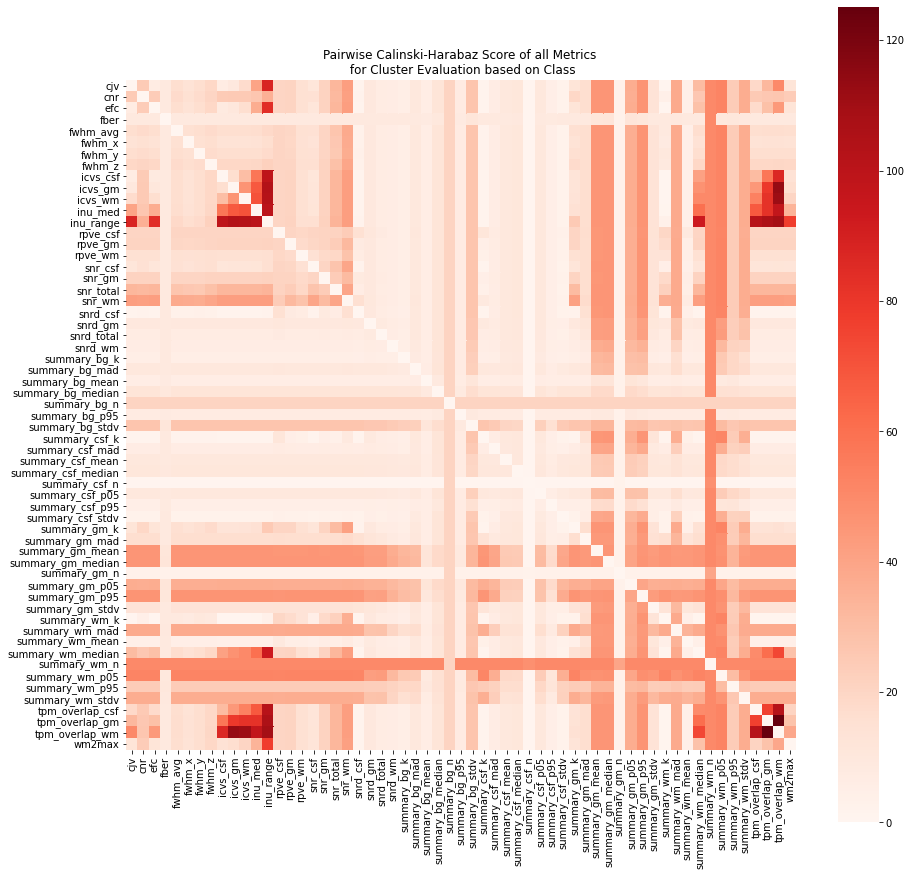

In [47]:
CHS_figure = plt.figure(figsize = (15,15))
sns.heatmap(CH_df, square = True, cmap = 'Reds')
plt.title('Pairwise Calinski-Harabaz Score of all Metrics \n for Cluster Evaluation based on Class')

In [414]:
CHS_figure.savefig('/Users/labc02/Documents/PREEMACS/Raw_metrics_Calkinsky_Harabaz_eval.png', ppi = 600)

In [48]:
# Threshold detection by minimizing edge density
p_ch = []
for ii in np.arange(0.0, max(CH_df.max()), 0.01):
    wk_df = CH_df[CH_df > ii].dropna(axis = 0, how = 'all')
    wk_df = wk_df[wk_df > ii].dropna(axis = 1, how = 'all')
    n = wk_df.shape[0]
    max_ed = (n*(n-1))
    wk_sum = wk_df.notnull().sum().sum()
    wk_p = wk_sum / max_ed
    p_ch.append(wk_p)

In [60]:
# Get the values of the vector
k = np.array(p_ch)
chs_vec = np.arange(0.0, max(CH_df.max()), 0.01)
k_min = np.argmin(k)
thd = chs_vec[k_min] # threshold value

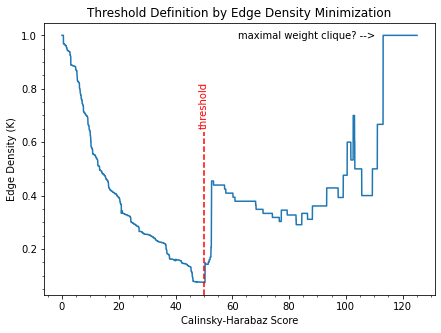

In [50]:
th_fig = plt.figure(figsize=(7,5))
ax = th_fig.add_subplot()
plt.plot(np.arange(0.0, max(CH_df.max()), 0.01), p_ch)
plt.title('Threshold Definition by Edge Density Minimization')
plt.xlabel('Calinsky-Harabaz Score')
plt.ylabel('Edge Density (K)')
plt.axvline(50, 0, .6, color = 'r', linestyle = '--')
plt.annotate('threshold', xy = (chs_vec[k_min], .6), xytext = (-5, 15), textcoords = 'offset points', color = 'r', rotation = 90)
plt.annotate('maximal weight clique? -->', xy = (115, 1), xytext = (-150, -3), textcoords = 'offset points', color = 'k')
plt.minorticks_on()


In [468]:
th_fig.savefig('/Users/labc02/Documents/PREEMACS/threshold_edge_min.png', ppi = 600)

In [52]:
thrd = chs_vec[k_min]
#thd_df = CH_df[CH_df > thrd].dropna(how = 'all')
#thd_df = thd_df[thd_df > thrd].dropna(axis = 1, how = 'all')

In [53]:
sig_int = []
for column in CH_df.columns:
    sum_int = CH_df[CH_df >thrd][column].notnull().sum()
    sig_int.append(sum_int)

In [54]:
int_df = pd.DataFrame(data = zip(sig_int, CH_df.columns), columns = ['count', 'metric'])
int_df.sort_values(by = 'count', inplace = True, ascending = False)
int_df

,count,metric
51,55,summary_wm_n
52,29,summary_wm_p05
12,13,inu_range
57,11,tpm_overlap_wm
56,10,tpm_overlap_gm
11,10,inu_med
10,8,icvs_wm
55,7,tpm_overlap_csf
50,7,summary_wm_median
8,6,icvs_csf


In [347]:
p_ = []
deg = []
for ii in range(1,max(int_df['count']), 1):
    num = int_df[int_df['count']>ii].shape[0]
    p = num/int_df['count'].shape[0]
    p_.append(p)
    deg.append(ii)

In [395]:
s, b = np.polyfit(np.log10(deg), np.log10(p_), 1)

In [387]:
s, b

(-0.9393918159914557, -0.24211574682941758)

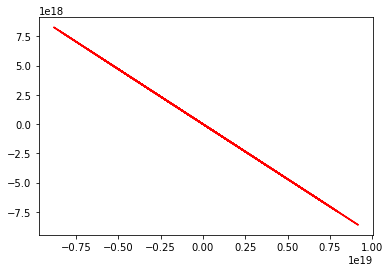

In [392]:
plt.plot((10**np.array(deg)), (s*(10**np.array(deg))+b), 'r-')

In [56]:
mtr = int_df['count'].values.shape[0]

<ipython-input-403-c320c6f1ac42>:18: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


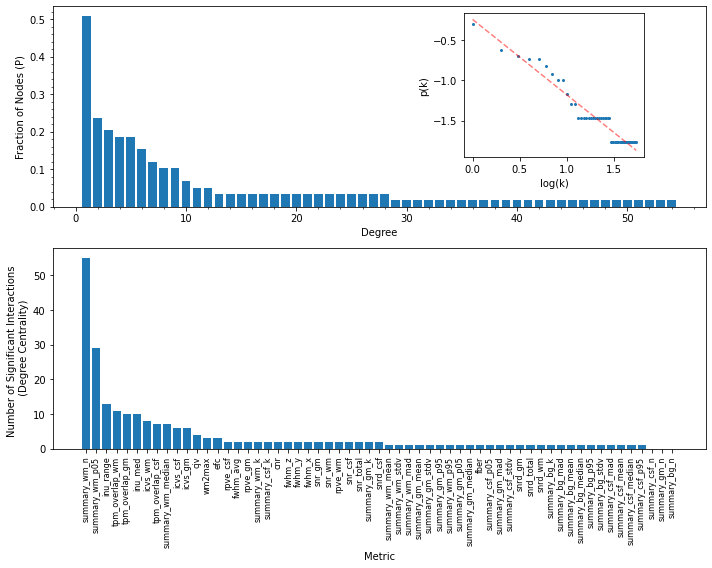

In [403]:
inter_fig = plt.figure(figsize = (10, 8))
ax = inter_fig.add_subplot(212)
plt.bar(x = np.arange(0,mtr, 1), height = int_df['count'].values)
plt.xticks(np.arange(0,mtr, 1))
ax.set_xticklabels(int_df['metric'], rotation = 90, fontsize = 8)
plt.xlabel('Metric')
plt.ylabel('Number of Significant Interactions \n (Degree Centrality)')
ax_1 = inter_fig.add_subplot(211)
plt.bar(deg, p_)
plt.xlabel('Degree')
plt.ylabel('Fraction of Nodes (P)')
plt.minorticks_on()
a = plt.axes([.65, .72, .25, .25])
plt.scatter(np.log10(deg), np.log10(p_), s = 4)
plt.plot(np.log10(deg), (s*np.log10(deg)+b), 'r--', alpha = .5)
plt.ylabel('p(k)')
plt.xlabel('log(k)')
plt.tight_layout()

In [394]:
inter_fig.savefig('/Users/labc02/Documents/PREEMACS/interaction_count.png', ppi = 600, bbox_inches='tight')

In [158]:
CH_g = nx.Graph()

In [159]:
CH_g.add_nodes_from(CH_df.columns)

In [160]:
for ii in CH_df.columns:
    for jj in CH_df.index:
        if CH_df.loc[ii, jj] > thd:
            CH_g.add_edge(ii, jj, weight = (1/CH_df.loc[ii, jj]))

In [307]:
nodes = sorted(CH_g.nodes)
sizes = [CH_g.degree[ii]*10 if CH_g.degree[ii]>0 else 5 for ii in nodes]

In [258]:
pos = nx.spring_layout(CH_g, seed = 100)
pos

{'cjv': array([ 0.00137145, -0.35549409]),
 'cnr': array([-0.11253992,  0.29366101]),
 'efc': array([-0.18309149, -0.25587733]),
 'fber': array([0.27193004, 0.56112426]),
 'fwhm_avg': array([-0.32923703,  0.03583414]),
 'fwhm_x': array([ 0.43945723, -0.0860549 ]),
 'fwhm_y': array([-0.26109252, -0.36141035]),
 'fwhm_z': array([-0.21911333,  0.22449735]),
 'icvs_csf': array([ 0.2385207, -0.2925439]),
 'icvs_gm': array([ 0.34171536, -0.21511482]),
 'icvs_wm': array([0.15508658, 0.03322222]),
 'inu_med': array([ 0.18677507, -0.11477759]),
 'inu_range': array([ 0.0586363 , -0.23411101]),
 'rpve_csf': array([-0.34577308, -0.24660617]),
 'rpve_gm': array([ 0.15561817, -0.4414842 ]),
 'rpve_wm': array([0.16195916, 0.29287004]),
 'snr_csf': array([-0.30251324, -0.12860503]),
 'snr_gm': array([-0.30955011,  0.14490349]),
 'snr_total': array([ 0.31583363, -0.37094403]),
 'snr_wm': array([0.3925175 , 0.10716603]),
 'snrd_csf': array([0.28434086, 0.22467584]),
 'snrd_gm': array([ 0.1917544, -0.613

In [265]:
num_nodes = []
clique_idx = []
for ii, jj in enumerate(clique.find_cliques(CH_g)):
    num_nodes.append(len(jj))
    clique_idx.append(ii)

In [304]:
all_cliques = [ii for ii in clique.find_cliques(CH_g)]
max_clique = all_cliques[32]
max_pos = nx.spring_layout(CH_g.subgraph(max_clique), seed = 100)
max_nodes = sorted(max_clique)
max_sizes = [CH_g.degree[ii]*100 for ii in max_nodes]

In [305]:
x_values, y_values = zip(*max_pos.values())
x_max = max(x_values)
x_min = min(x_values)
y_max = max(y_values)
y_min = min(y_values)
x_margin = (x_max - x_min) * 0.25
y_margin = (y_max - y_min) * 0.25

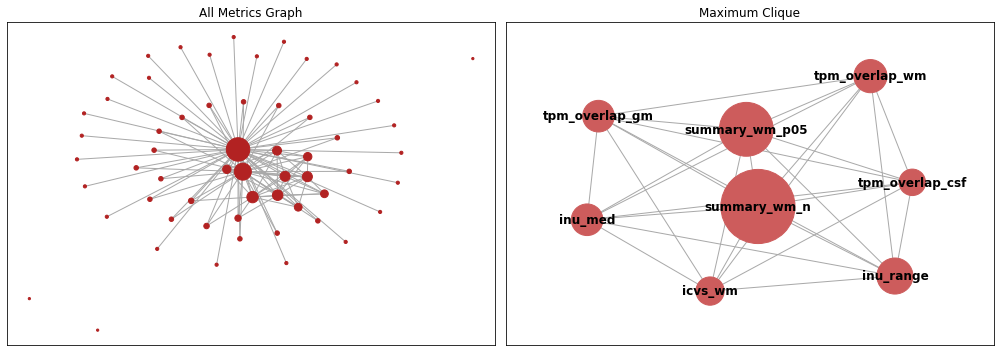

In [437]:
CHg_fig = plt.figure(figsize = (14,5))
ax_1 = CHg_fig.add_subplot(121)
nx.draw_networkx(CH_g, pos = pos, nodelist = nodes, node_size = sizes, node_color = 'firebrick', node_edge = 'k', with_labels = False, edge_color = 'darkgray', ax = ax_1)
ax_1.set_title('All Metrics Graph')
ax_2 = CHg_fig.add_subplot(122)
nx.draw_networkx(CH_g.subgraph(max_clique), pos = max_pos, nodelist = max_nodes, node_size = max_sizes, node_color = 'indianred', edge_color = 'darkgray', font_weight='bold', ax = ax_2)
ax_2.set_title('Maximum Clique')
plt.xlim(x_min - x_margin, x_max + x_margin)
plt.ylim(y_min - y_margin, y_max + y_margin)
plt.tight_layout()

In [438]:
CHg_fig.savefig('/Users/labc02/Documents/PREEMACS/metrics_graph.png', ppi = 600, bbox_inches='tight')

Text(0.5, 1.0, 'Standarized per Site Data Dendrogram')

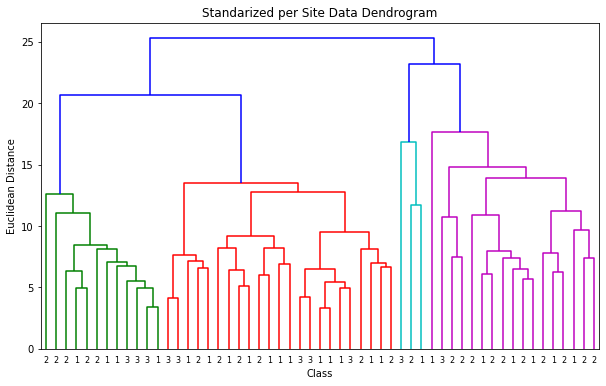

In [117]:
den_fig = plt.figure(figsize=(10,6))
ax = plt.subplot(111)
z = clust.hierarchy.linkage(std_df.iloc[:,3:], 'ward')
clust.hierarchy.dendrogram(z, ax = ax, labels = std_df['Class'].values)
plt.xticks(fontsize = 8, rotation = 'horizontal')
plt.ylabel('Euclidean Distance')
plt.xlabel('Class')
plt.title(' Data Dendrogram')

#den_fig.savefig('C:\\Users\\FELIPE\\Documents\\PREEMACS\\raw_data_dendrogram.png', dpi = 600)

In [165]:
den_fig.savefig('/Users/labc02/Documents/PREEMACS/individual_norm_data_dendrogram.png')

In [40]:
ftrs_df = trim_data.drop('bids_name', axis = 1)
labels = trim_data['bids_name'] 

In [118]:
pca = PCA(n_components = 3)
pca_fit = pca.fit_transform(std_df.iloc[:, 3:])
pca_df = pd.DataFrame(data = pca_fit, columns = ['PC1', 'PC2', 'PC3'])

In [119]:
pca_df['ID'] = std_df['Class'].values

Text(0.5, 0.98, 'Scaled Data PCA')

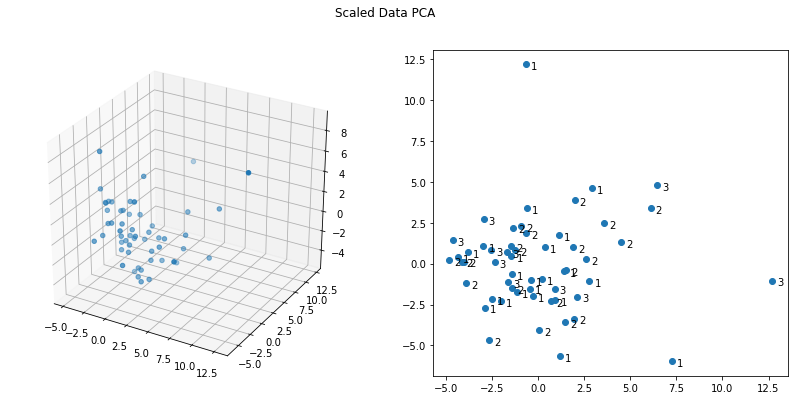

In [123]:
raw_pca = plt.figure(figsize=(14,6))
ax_3 = raw_pca.add_subplot(121, projection='3d')
ax_3.scatter(pca_df['PC1'], pca_df['PC2'], pca_df['PC3'])
ax_2  = raw_pca.add_subplot(122)
ax_2.scatter(pca_df['PC1'], pca_df['PC2'])
for ii, txt in enumerate(pca_df['ID']):
    ax_2.annotate(txt, (pca_df['PC1'][ii], pca_df['PC2'][ii]), (5, -5), textcoords = 'offset points')
raw_pca.suptitle('Scaled Data PCA')
#raw_pca.savefig('C:\\Users\\FELIPE\\Documents\\PREEMACS\\raw_data_PCA.png', dpi = 600)

In [164]:
raw_pca.savefig('/Users/labc02/Documents/PREEMACS/individually_scaled_data_PCA.png', dpi = 600)

In [67]:
std_ftrs = StandardScaler().fit_transform(ftrs_df)
pca = PCA(n_components = 3)
pca_fitstd = pca.fit_transform(std_ftrs)
stdPca_df = pd.DataFrame(data = pca_fitstd, columns = ['PC1', 'PC2', 'PC3'])

Text(0.5,0.98,'Scaled Data PCA')

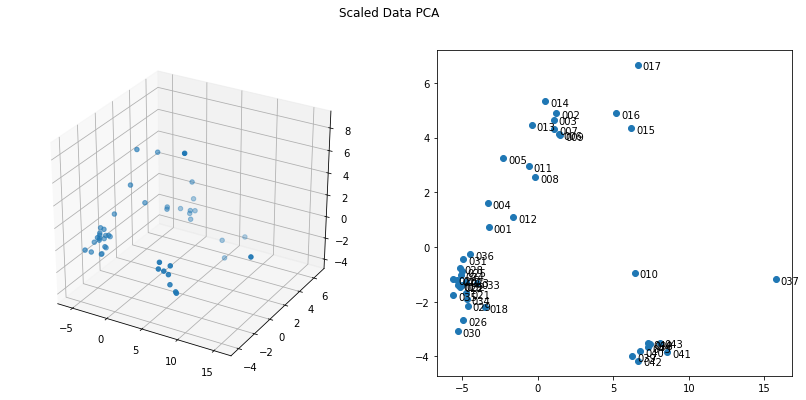

In [97]:
std_pca = plt.figure(figsize=(14,6))
ax_3 = std_pca.add_subplot(121, projection='3d')
ax_3.scatter(stdPca_df['PC1'], stdPca_df['PC2'], stdPca_df['PC3'])
ax_2  = std_pca.add_subplot(122)
ax_2.scatter(stdPca_df['PC1'], stdPca_df['PC2'])
for ii, txt in enumerate(labels):
    txt = txt.split('_')[0]
    txt = txt.split('-')[1]
    ax_2.annotate(txt, (stdPca_df['PC1'][ii], stdPca_df['PC2'][ii]), (5, -5), textcoords = 'offset points')
std_pca.suptitle('Scaled Data PCA')
#std_pca.savefig('C:\\Users\\FELIPE\\Documents\\PREEMACS\\scaled_data_PCA.png', dpi = 600)

In [82]:
for ii, txt in enumerate(labels):
    print(type(ii), type(txt))

<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class 'str'>
<class 'int'> <class